# Assignment 1
Talia Arauzo
<br>CE 263N

### Import Data

Import necessary <b>packages</b>

In [1]:
import numpy as np 
import networkx as nx
import pandas as pd
import collections
import matplotlib.pyplot as plt
%matplotlib inline

Import <b>nodes</b> file

In [2]:
# Import nodes file
nodes = pd.read_csv('nodes.csv', delimiter = ',', index_col = 0).transpose()

Import <b>random links</b> file

In [3]:
# Import random links file
links_random = pd.read_csv('links_random.csv', delimiter = ",")

Import <b>interests links</b> file

In [4]:
# Import interests links file
links_interests = pd.read_csv('links_interests.csv', delimiter = ",")

Import <b>acquaintances links</b> file

In [5]:
# Import acquaintances links file
links_acquaintances = pd.read_csv('links_acquaintances.csv', delimiter = ",")

### Initialize Networks

Initialize <b>random network</b> with nodes and random links

In [6]:
# Initialize random network graph
g_random = nx.DiGraph()

# For every node
for n in nodes.columns:
    
    # Add node to graph
    g_random.add_node(n, name = nodes[n].values[0], major = nodes[n].values[1], research = nodes[n].values[2],
                  hobby = nodes[n].values[3], job = nodes[n].values[4], gender = nodes[n].values[5])
    
# For every link
for l in links_random.index.values:
    
    # Add link to graph
    g_random.add_edge(links_random['source'][l], links_random['target'][l])

Initialize <b>interests network</b> with nodes and interests links
<br> <b>Note:</b> A node 64 erroneously writen as a link, kept node 64 in network

In [7]:
# Initialize interests network graph
g_interests = nx.DiGraph()

# For every node
for n in nodes.columns:
    
    # Add node to graph
    g_interests.add_node(n, name = nodes[n].values[0], major = nodes[n].values[1], research = nodes[n].values[2],
                  hobby = nodes[n].values[3], job = nodes[n].values[4], gender = nodes[n].values[5])
    
# For every link
for l in links_interests.index.values:
    
    # Add link to graph
    g_interests.add_edge(links_interests['source'][l], links_interests['target'][l], weight = links_interests['weight'][l])

Initialize <b>acquaintances network</b> with nodes and acquaintances links

In [8]:
# Initialize interests network graph
g_acquaintances = nx.DiGraph()

# For every node
for n in nodes.columns:
    
    # Add node to graph
    g_acquaintances.add_node(n, name = nodes[n].values[0], major = nodes[n].values[1], research = nodes[n].values[2],
                  hobby = nodes[n].values[3], job = nodes[n].values[4], gender = nodes[n].values[5])
    
# For every link
for l in links_acquaintances.index.values:
    
    # Add link to graph
    g_acquaintances.add_edge(links_acquaintances['source'][l], links_acquaintances['target'][l], weight = links_acquaintances['weight'][l])

### Remove Isolate From Networks
<br><b>Note:</b> Isolates are nodes with no neighbors (k=0)

Remove isolates from <b>random network</b>

In [9]:
# Isolates in random network graph
isolates_random = list(nx.isolates(g_random))

# Remove isolates from radnom network graph
for isolate_node in isolates_random:
    g_random.remove_node(isolate_node)

Remove isolates from <b>interests network</b>

In [10]:
# Isolates in random network graph
isolates_interests = list(nx.isolates(g_interests))

# Remove isolates from radnom network graph
for isolate_node in isolates_interests:
    g_interests.remove_node(isolate_node)

Remove isolates from <b>acquaintances network</b>

In [11]:
# Isolates in random network graph
isolates_acquaintances = list(nx.isolates(g_acquaintances))

# Remove isolates from radnom network graph
for isolate_node in isolates_acquaintances:
    g_acquaintances.remove_node(isolate_node)

## Part I: Basic Network Analysis

### 1. How many nodes and links does each network have?

<b>Random Network</b>

In [12]:
# Number of nodes in random network graph
print("# nodes random network: ", g_random.number_of_nodes())

# Number of links in random network graph
print("# links random network: ", g_random.number_of_edges())

# nodes random network:  60
# links random network:  183


<b>Interests Network</b>

In [13]:
# Number of nodes in interests network graph
print("# nodes interests network: ", g_interests.number_of_nodes())

# Number of links in random network graph
print("# links interests network: ", g_interests.number_of_edges())

# nodes interests network:  53
# links interests network:  176


<b>Acquaintances Network</b>

In [14]:
# Number of nodes in acquaintances network graph
print("# nodes acquaintances network: ", g_acquaintances.number_of_nodes())

# Number of links in acquaintances network graph
print("# links acquaintances network: ", g_acquaintances.number_of_edges())

# nodes acquaintances network:  52
# links acquaintances network:  146


### 2. What is the average degree of each network?

<b>Random Network</b>

In [15]:
# Average degree of random network graph
print("avg. degree random network: ", np.mean(list(dict(g_random.degree()).values())))

avg. degree random network:  6.1


<b>Interests Network</b>

In [16]:
# Average degree of interests network graph
print("avg. degree interests network: ", np.mean(list(dict(g_interests.degree()).values())))

avg. degree interests network:  6.6415094339622645


<b>Acquaintances Network</b>

In [17]:
# Average degree of acquaintances network graph
print("avg. degree acquaintances network: ", np.mean(list(dict(g_acquaintances.degree()).values())))

avg. degree acquaintances network:  5.615384615384615


### 3. What is the maximum in-degree of each network? To which node does it correspond?

<b>Random Network</b>

In [18]:
# Dictionary of nodes and in-degrees random network
dict_random = dict(g_random.in_degree())

# Max in-degree random network
max_indeg_random = max(dict_random.values())

# Node with max in-degree random network
node_indeg_random = [k for k, v in dict_random.items() if v == max_indeg_random]

In [19]:
# Max in-degree of random network
print("max in-degree random network: ", max_indeg_random)

# Node with max in-degree random network
print("node(s) with max in-degree random network: ", node_indeg_random)

max in-degree random network:  8
node(s) with max in-degree random network:  [2]


<b>Interests Network</b>

In [20]:
# Dictionary of nodes and in-degrees interests network
dict_interests = dict(g_interests.in_degree())

# Max in-degree random network
max_indeg_interests = max(dict_interests.values())

# Node with max in-degree random network
node_indeg_interests = [k for k, v in dict_interests.items() if v == max_indeg_interests]

In [21]:
# Max in-degree of interests network
print("max in-degree interests network: ", max_indeg_interests)

# Node with max in-degree interests network
print("node(s) with max in-degree interests network: ", node_indeg_interests)

max in-degree interests network:  12
node(s) with max in-degree interests network:  [60]


<b>Acquaintances Network</b>

In [22]:
# Dictionary of nodes and in-degrees acquaintances network
dict_acquaintances = dict(g_acquaintances.in_degree())

# Max in-degree random network
max_indeg_acquaintances = max(dict_acquaintances.values())

# Node with max in-degree random network
node_indeg_acquaintances = [k for k, v in dict_acquaintances.items() if v == max_indeg_acquaintances]

In [23]:
# Max in-degree of acquaintances network
print("max in-degree acquaintances network: ", max_indeg_acquaintances)

# Node with max in-degree acquaintances network
print("node(s) with max in-degree acquaintances network: ", node_indeg_acquaintances)

max in-degree acquaintances network:  9
node(s) with max in-degree acquaintances network:  [5, 24]


### 4. Display the histograms of the in-degree of each network.

<b>Random Network</b>

In [24]:
# Sorted (decreasing value) in-degree random network
indeg_seq_random = sorted([d for n, d in g_random.in_degree()], reverse=True)

# Dictionary of in-degree counts random network
indeg_cnt_random = collections.Counter(indeg_seq_random)

# In-degrees and counts in zip format random network
indeg_random, cnt_random = zip(*indeg_cnt_random.items())

<b>Interests Network</b>

In [25]:
# Sorted (decreasing value) in-degree interests network
indeg_seq_interests = sorted([d for n, d in g_interests.in_degree()], reverse=True)

# Dictionary of in-degree counts interests network
indeg_cnt_interests = collections.Counter(indeg_seq_interests)

# In-degrees and counts in zip format interests network
indeg_interests, cnt_interests = zip(*indeg_cnt_interests.items())

<b>Acquaintances Network</b>

In [26]:
# Sorted (decreasing value) in-degree acquaintances network
indeg_seq_acquaintances = sorted([d for n, d in g_acquaintances.in_degree()], reverse=True)

# Dictionary of in-degree counts acquaintances network
indeg_cnt_acquaintances = collections.Counter(indeg_seq_acquaintances)

# In-degrees and counts in zip format acquaintances network
indeg_acquaintances, cnt_acquaintances = zip(*indeg_cnt_acquaintances.items())

<b>Histogram</b> of in-degrees of all networks

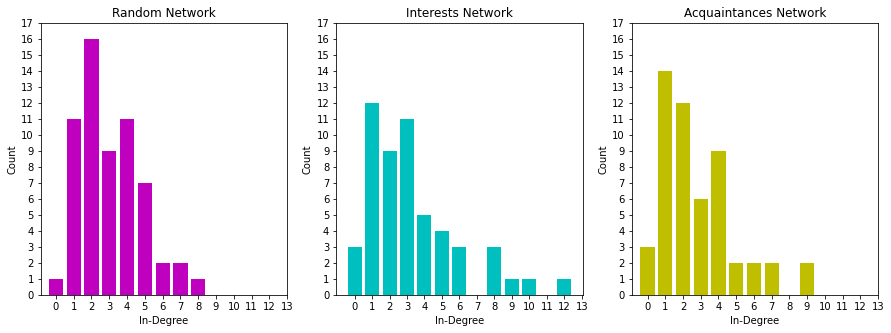

In [27]:
# Create plot figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))

# Axes tick marks
x_tick = np.arange(max(indeg_random[0], indeg_interests[0], indeg_acquaintances[0]) + 2)
y_tick = np.arange(max(max(cnt_random), max(cnt_interests), max(cnt_acquaintances)) + 2)

# Width of bars
w = 0.8

# Subplot 1: Random Network
ax1.bar(indeg_random, cnt_random, width = w, color = "m")
ax1.set_title("Random Network")
ax1.set_xlabel("In-Degree")
ax1.set_ylabel("Count")
ax1.set_xticks(x_tick)
ax1.set_yticks(y_tick);

# Subplot 2: Interests Network
ax2.bar(indeg_interests, cnt_interests, width = w, color = "c")
ax2.set_title("Interests Network")
ax2.set_xlabel("In-Degree")
ax2.set_ylabel("Count")
ax2.set_xticks(x_tick)
ax2.set_yticks(y_tick);

# Subplot 3: Acquaintances Network
ax3.bar(indeg_acquaintances, cnt_acquaintances, width = w, color = "y")
ax3.set_title("Acquaintances Network")
ax3.set_xlabel("In-Degree")
ax3.set_ylabel("Count")
ax3.set_xticks(x_tick)
ax3.set_yticks(y_tick);

## Part II: Networks vs. Models

### 1. What are the average clustering coefficients, average degrees, average shortest paths, number of nodes, and number of links of each empirical network?

Function for outputting characteristics of networks

In [28]:
def characteristics(graph):
    
    # Average clustering coefficient
    print("avg. clustering coefficient, <C>: ", np.round(nx.average_clustering(graph), 3))

    # Average degree
    print("avg. degree, <k>: ", np.round(np.mean(list(dict(graph.degree()).values())), 3))

    # Average shortest path
    print("avg. shortest path, <l>: ", np.round(nx.average_shortest_path_length(graph), 3))

    # Number of nodes
    print("# nodes, N: ", graph.number_of_nodes())

    # Number of links
    print("# links, L: ", graph.number_of_edges())

<b>Random Network</b>

In [29]:
# Characteristics of empirical random networks
characteristics(g_random)

avg. clustering coefficient, <C>:  0.046
avg. degree, <k>:  6.1
avg. shortest path, <l>:  2.497
# nodes, N:  60
# links, L:  183


<b>Interests Network</b>

In [30]:
# Characteristics of empirical interests networks
characteristics(g_interests)

avg. clustering coefficient, <C>:  0.097
avg. degree, <k>:  6.642
avg. shortest path, <l>:  2.473
# nodes, N:  53
# links, L:  176


<b>Acquaintances Network</b>

In [31]:
# Characteristics of empirical acquaintances networks
characteristics(g_acquaintances)

avg. clustering coefficient, <C>:  0.237
avg. degree, <k>:  5.615
avg. shortest path, <l>:  1.6
# nodes, N:  52
# links, L:  146


### 2. Generate SW models of the three networks, matching number of nodes and average degree.

Function for generating Small World models of empirical networks

In [389]:
def sw_model(n, k, p, seed = None):

    # SW model of network
    g_sw = nx.watts_strogatz_graph(n, k, p, seed = seed)

    # Characteristics of SW model of network
    characteristics(g_sw)
    
    # Return graph
    return g_sw

<b>Random Network</b> (N = 60, k $\approx$ 6, p = 0.92)

In [390]:
# SW model of random network
g_random_sw = sw_model(60, 6, 0.92, 21)

avg. clustering coefficient, <C>:  0.054
avg. degree, <k>:  6.0
avg. shortest path, <l>:  2.421
# nodes, N:  60
# links, L:  180


<b>Interests Network</b> (N = 53, k $\approx$ 6, p = 0.7)

In [391]:
# SW model of interests network
g_interests_sw = sw_model(53, 6, 0.7, 21)

avg. clustering coefficient, <C>:  0.097
avg. degree, <k>:  6.0
avg. shortest path, <l>:  2.372
# nodes, N:  53
# links, L:  159


<b>Acquaintances Network</b> (N = 52, k $\approx$ 6, p = 0.35)

In [392]:
# SW model of acquaintances network
g_acquaintances_sw = sw_model(52, 6, 0.35, 21)

avg. clustering coefficient, <C>:  0.236
avg. degree, <k>:  6.0
avg. shortest path, <l>:  2.444
# nodes, N:  52
# links, L:  156


### 3. Generate random models of the three networks, using k close to average degree and <br>p = 1.</br>
<br><b>Note:</b> For random graphs, C = p = $\frac{<k>}{N-1}$</br>

Function for generating random models of empirical networks

In [393]:
def random_model(n, p, seed = None):
    
    # Random model of network
    g_r = nx.erdos_renyi_graph(n, p, seed = seed)

    # Characteristics of random model of network
    characteristics(g_r)
    
    # Return graph
    return g_r

<b>Random Network</b> (N = 60, p = $\frac{6.1}{59}$ $\approx$ 0.1034)

In [394]:
# Random model of random network
g_random_r = random_model(60, 0.11, 21)

avg. clustering coefficient, <C>:  0.091
avg. degree, <k>:  6.0
avg. shortest path, <l>:  2.468
# nodes, N:  60
# links, L:  180


<b>Interests Network</b> (N = 53, p = $\frac{6.642}{52}$ $\approx$ 0.1277)

In [395]:
# Random model of interests network
g_interests_r = random_model(53, 0.12, 21)

avg. clustering coefficient, <C>:  0.107
avg. degree, <k>:  5.623
avg. shortest path, <l>:  2.464
# nodes, N:  53
# links, L:  149


<b>Acquaintances Network</b> (N = 52, p = 0.23)

In [403]:
# Random model of acquaintances network
g_acquaintances_r = random_model(52, 0.23, 21)

avg. clustering coefficient, <C>:  0.233
avg. degree, <k>:  10.962
avg. shortest path, <l>:  1.853
# nodes, N:  52
# links, L:  285


### 4. Comparison of degree distribution histograms for empirial, SW, and random models for each network. 

Function for generating histogram of degrees for empirical, SW, and random models of the given network

In [404]:
def histogram_comparison(e, sw, r, model_name):

    # Empirical model
    e_deg_seq = sorted([d for n, d in e.degree()], reverse=True)  
    e_deg_count = collections.Counter(e_deg_seq)
    e_deg, e_count = zip(*e_deg_count.items())
    d = 0
    n = 0

    # Small World model
    sw_deg_seq = sorted([d for n, d in sw.degree()], reverse=True)  
    sw_deg_count = collections.Counter(sw_deg_seq)
    sw_deg, sw_count = zip(*sw_deg_count.items())
    d = 0
    n = 0

    # Interests 
    r_deg_seq = sorted([d for n, d in r.degree()], reverse=True)  
    r_deg_count = collections.Counter(r_deg_seq)
    r_deg, r_count = zip(*r_deg_count.items())

    # Plot characteristics
    w = 0.2
    x_tick = np.arange(max(max(e_deg), max(sw_deg), max(r_deg)) + 1)
    y_tick = np.arange(max(max(e_count), max(sw_count), max(r_count)) + 1)
    
    # Plot each model
    plt.figure(figsize = (8, 8))
    e_deg = [i - w for i in e_deg]
    r_deg = [i + w for i in r_deg]
    plt.bar(e_deg, e_count, width = w, color = "m", label = 'Empirical model')
    plt.bar(sw_deg, sw_count, width = w, color = "c", label = 'Small World model')
    plt.bar(r_deg, r_count, width = w, color = "y", label = 'Random model')
    plt.title(model_name + " Network Degree Distribution Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.legend(loc='best')
    plt.xticks(x_tick)
    plt.yticks(y_tick);

<b>Random Network</b>

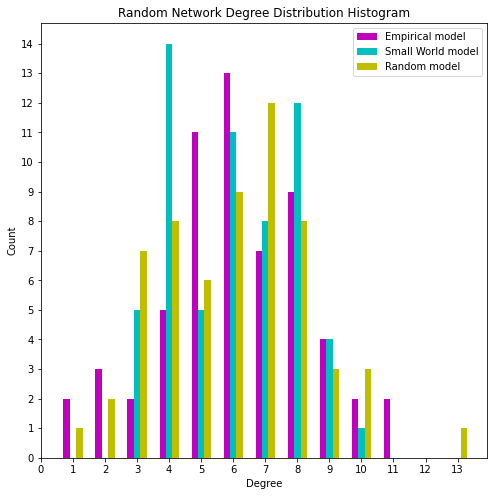

In [405]:
# Histogram comparison of random network modeled as empirical, Small World, and random
histogram_comparison(g_random, g_random_sw, g_random_r, "Random")

<b>Interests Network</b>

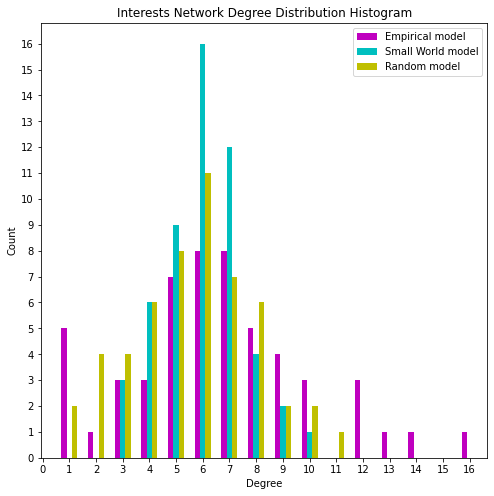

In [406]:
# Histogram comparison of interests network modeled as empirical, Small World, and random
histogram_comparison(g_interests, g_interests_sw, g_interests_r, "Interests")

<b>Aquaintances Network</b>

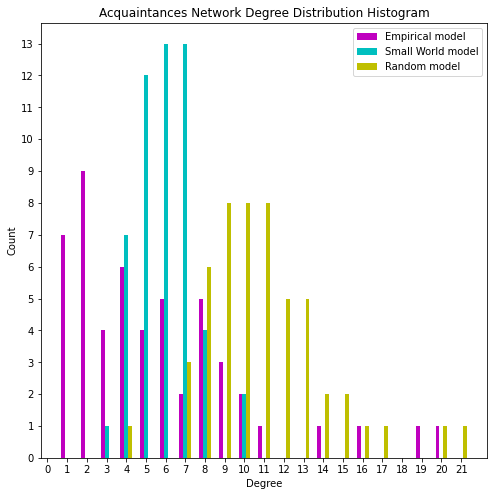

In [407]:
# Histogram comparison of acquaintances network modeled as empirical, Small World, and random
histogram_comparison(g_acquaintances, g_acquaintances_sw, g_acquaintances_r, "Acquaintances")

### 5. Do the empirical networks have the small world property?

<b>Random Network</b>

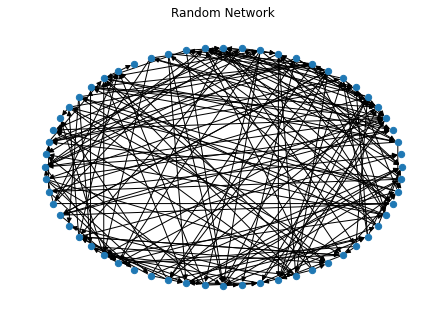

In [408]:
# Circular graph for empirical random network
nx.draw_circular(g_random, node_size = 40)
plt.title("Random Network");

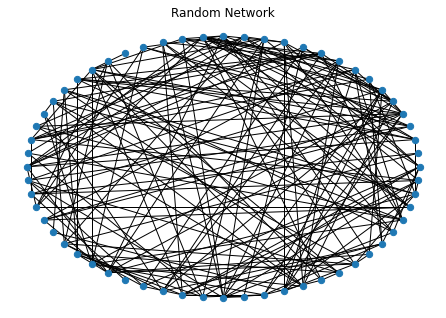

In [409]:
# Circular graph for empirical random network
nx.draw_circular(g_random.to_undirected(), node_size = 40)
plt.title("Random Network");

<b>Interests Network</b>

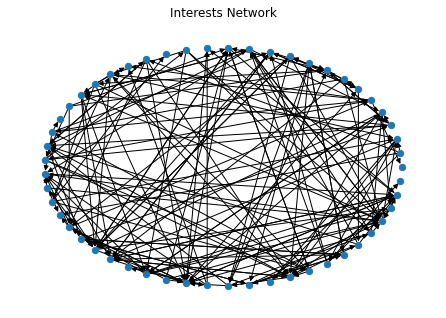

In [410]:
# Circular graph for empirical interests network
nx.draw_circular(g_interests, node_size = 40)
plt.title("Interests Network");

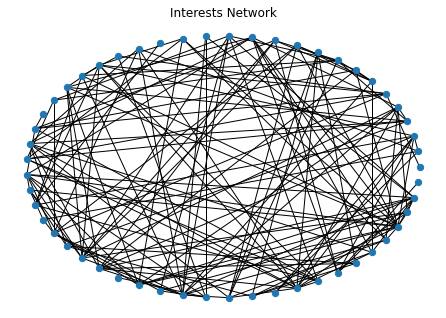

In [411]:
# Circular graph for empirical interests network
nx.draw_circular(g_interests.to_undirected(), node_size = 40)
plt.title("Interests Network");

<b>Acquaintances Network</b>

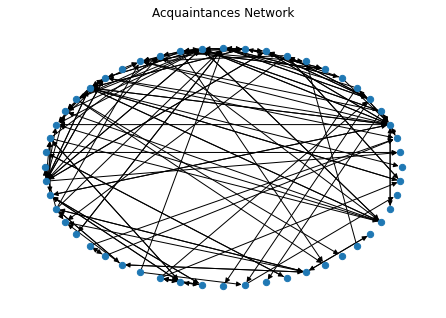

In [412]:
# Circular graph for empirical acquaintances network
nx.draw_circular(g_acquaintances, node_size = 40)
plt.title("Acquaintances Network");

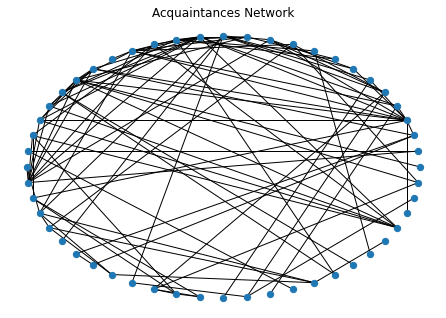

In [413]:
# Circular graph for empirical acquaintances network
nx.draw_circular(g_acquaintances.to_undirected(), node_size = 40)
plt.title("Acquaintances Network");

Function for creaing Small World property graph

In [174]:
def sw_graph(n, k, seed):
    
    # Resolution (number of different values of p, the rewiring probability)
    r = 20

    # Generate a set of r logarithmically spaced values of p
    p_range = [0] + np.logspace(-4, 0, r).tolist()

    # For each p, compute the characterstic measures of the Watt-Strogatz model (n,k,p)
    clustering = []
    sp_length  = []
    for p in p_range:

        # Create a Watts-Strogatz graph
        graph = nx.watts_strogatz_graph(n, k, p, seed = seed)

        # Compute the average shortest-path length L(p)
        sp_length.append(nx.average_shortest_path_length(graph))

        # Compute the clustering coefficient C(p)
        clustering.append(nx.average_clustering(graph))

    # Plot L(p)/L(0) and C(p)/C(0)
    plt.figure(1,figsize=(6,6))
    plt.semilogx(p_range[1:] , [L / sp_length[0]  for L in sp_length[1:]]  , 'sb', markersize=10, label='L(p)/L(0) - avg. shortest path')
    plt.semilogx(p_range[1:] , [C / clustering[0] for C in clustering[1:]] , 'or', markersize=10, label='C(p)/C(0) - clustering coefficient')
    plt.semilogx(p_range[1:] , [(1-p)**3.0 for p in p_range[1:]] , '--', color=[0.2,0.2,0.2], linewidth=3, markersize=12, label='C(p)/C(0) - Analytical clustering')

    # Extend the plot region to see the points at both ends
    lims = plt.xlim()
    plt.xlim([lims[0]*0.9, lims[1]*1.1]) 
    lims = plt.ylim()
    plt.ylim([lims[0]*0.95, lims[1]*1.05]) 

    plt.title( "Characteristics of Watts-Strogatz model with n=%d and k=%d"%(n, k) , fontsize=16)
    plt.xlabel( "Rewiring probabiliy (p)" , fontsize=14)
    plt.ylabel( "L(p)/L(0) and C(p)/C(0)" , fontsize=14)
    plt.legend( loc='best' )
    plt.show()

<b>Random Network</b>

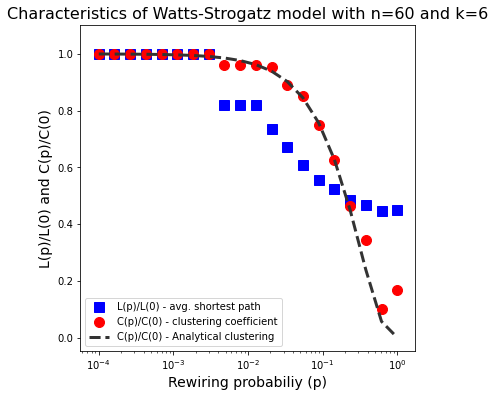

In [160]:
# Small World property graph for random network
sw_graph(60, 6, 21)

<b>Interests Network</b>

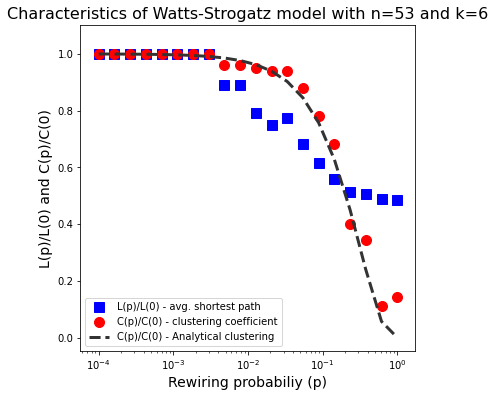

In [161]:
# Small World property graph for interests network
sw_graph(53, 6, 21)

<b>Acquaintances Network</b>

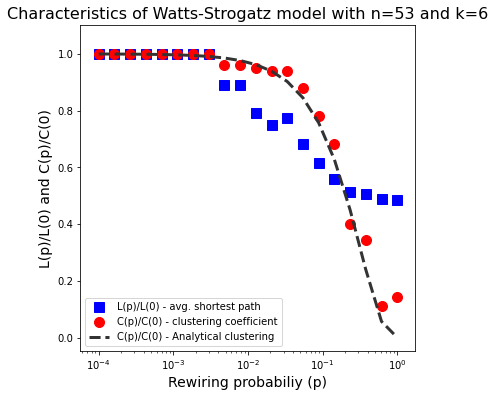

In [162]:
# Small World property graph for acquaintances network
sw_graph(53, 6, 21)